### Assignment 4
### Prepared By: Woon Kim
### UNI: wk2371
### Course: ACTU 5841
### Date: February 20 2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
def gradient_descent(x, y, B, learning_rate, max_iter):
    
    loss_history = []
    iteration = 0
    B_history = [B]

        
    for i in range(max_iter):
        iteration = iteration + 1
        
        gradient = np.array([
                    -2*np.sin(B[0,1]*x-B[0,2])*(y-B[0,0]*np.sin(B[0,1]*x-B[0,2]) - x*B[0,3]),
                    -2*B[0,0]*x*np.cos(B[0,1]*x-B[0,2]) * (y-B[0,0]*np.sin(B[0,1]*x-B[0,2]) - x*B[0,3]),
                    2*(y-B[0,0]*np.sin(B[0,1]*x-B[0,2])-x*B[0,3])*B[0,0]*np.cos(-1*B[0,2]+B[0,1]*x),
                    -2*x*(y-B[0,0]*np.sin(B[0,1]*x-B[0,2])-x*B[0,3])
                   ])
        
        B = B.reshape(-1,1)
        diff = learning_rate * np.sum((gradient * B),axis=1)
        
        B = B.reshape(1,-1)
        B = B - diff
        B_history.append(B)
        
        loss = np.sum(np.square(y - (B[0,0] * np.sin(B[0,1]*x - B[0,2]) +  B[0,3]*x)))
        
        #stop if there are no improvements in the loss
        if iteration > 1:
            if np.abs(loss - loss_history[0]) == 0:
                break  
            
        #keep track of the loss for each iteration
        loss_history.insert(0,loss)
      
                
    return loss, learning_rate, B, iteration, loss_history

In [4]:
x = df['x']
y = df['y']
B = np.array([0.1, 0.1, 0.1, 0.1])
B = B.reshape(1,-1)

In [5]:
results = (gradient_descent(x, y, B, 0.00007, 100000))

In [17]:
loss = results[0]
learning_rate = results[1]
B = results[2]
updates = results[3]

print('The smallest loss achieved is %s\nThe corresponding learning rate is %s\nThe "best" estimated B is %s\nThe number of updates at the "best" B is %s' % (loss, learning_rate, B, updates))

The smallest loss achieved is 22.25937575375531
The corresponding learning rate is 7e-05
The "best" estimated B is [[1.95654638 0.5067125  2.9917436  0.09249807]]
The number of updates at the "best" B is 3159


100000

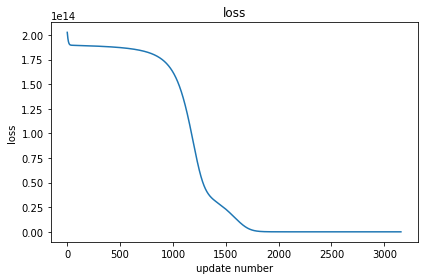

In [19]:
a = np.arange(0,updates-1,1)
b = np.flip(results[4])
b = (b - 22.298851605)/(0.000000000001)

plt.plot(a,b)
plt.title('loss')
plt.xlabel('update number')
plt.ylabel('loss')
#plt.show()

plt.tight_layout()
plt.savefig("Q5.png")


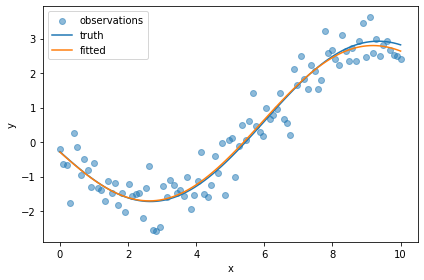

In [20]:
y_truth = 2 * np.sin(0.5*x - 3) +  0.1*x
y_fitted = B[0,0] * np.sin(B[0,1]*x - B[0,2]) +  B[0,3]*x

plt.scatter(x,y, label = "observations", alpha=0.5)
plt.plot(x,y_truth, label = "truth")
plt.plot(x,y_fitted, label = "fitted")
plt.legend(loc="upper left")
plt.plot
plt.xlabel('x')
plt.ylabel('y')
#plt.show()

plt.tight_layout()
plt.savefig("Q6.png")
